# X-means
参考文献

- [pyclustering.cluster.xmeans.xmeans Class Reference](https://pyclustering.github.io/docs/0.9.0/html/dd/db4/classpyclustering_1_1cluster_1_1xmeans_1_1xmeans.html)
- Pelleg, Dan, and Andrew W. Moore. "X-means: Extending k-means with efficient estimation of the number of clusters." Icml. Vol. 1. 2000.

In [1]:
# Google　Colaboratory で実行する場合はインストールする
if "google.colab" in str(get_ipython()):
    !pip install japanize_matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
# 表示する文字サイズを調整
plt.rc("font", size=20)
plt.rc("legend", fontsize=16)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)

# youtube動画を表示
import IPython.display
from IPython.display import Image

np.random.seed(777)

# k-meansでkをあらかじめ指定

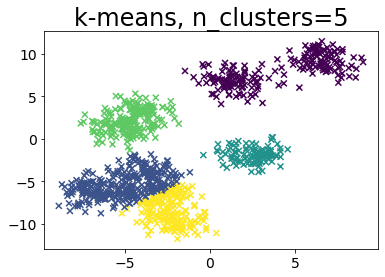

In [4]:
def plot_by_kmeans(X, k=5):
    y_pred = KMeans(n_clusters=k, random_state=random_state, init="random").fit_predict(
        X
    )

    plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker="x")
    plt.title(f"k-means, n_clusters={k}")


# サンプルデータを作成
n_samples = 1000
random_state = 117117
X, _ = make_blobs(
    n_samples=n_samples, random_state=random_state, cluster_std=1, centers=10
)

# k-means++を実行
plot_by_kmeans(X)

# x-meanでクラスタ数を指定せずに実行
## BAYESIAN_INFORMATION_CRITERION

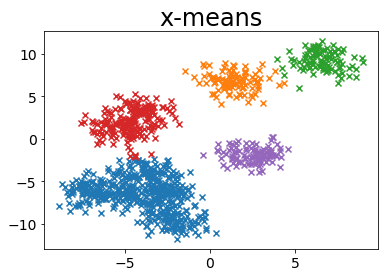

In [5]:
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

BAYESIAN_INFORMATION_CRITERION = 0
MINIMUM_NOISELESS_DESCRIPTION_LENGTH = 1


def plot_by_xmeans(
    X, c_min=3, c_max=10, criterion=BAYESIAN_INFORMATION_CRITERION, tolerance=0.025
):
    initial_centers = kmeans_plusplus_initializer(X, c_min).initialize()
    xmeans_instance = xmeans(
        X, initial_centers, c_max, criterion=criterion, tolerance=tolerance
    )
    xmeans_instance.process()

    # プロット用のデータを作成
    clusters = xmeans_instance.get_clusters()
    n_samples = X.shape[0]
    c = []
    for i, cluster_i in enumerate(clusters):
        X_ci = X[cluster_i]
        color_ci = [i for _ in cluster_i]
        plt.scatter(X_ci[:, 0], X_ci[:, 1], marker="x")
    plt.title("x-means")


# x-meansを実行
plot_by_xmeans(X, c_min=3, c_max=10, criterion=BAYESIAN_INFORMATION_CRITERION)

## MINIMUM_NOISELESS_DESCRIPTION_LENGTH

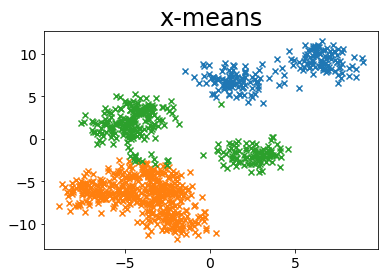

In [6]:
plot_by_xmeans(X, c_min=3, c_max=10, criterion=MINIMUM_NOISELESS_DESCRIPTION_LENGTH)

## toleranceの影響

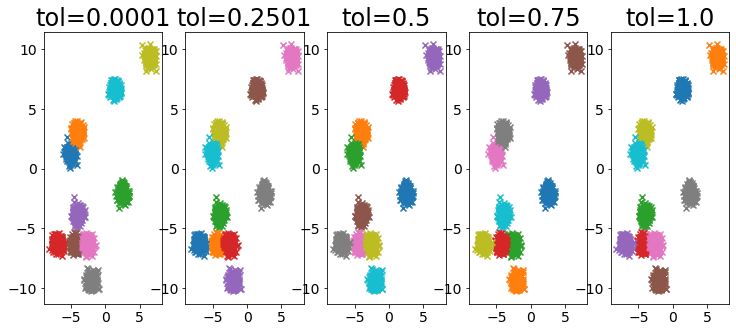

In [7]:
X, _ = make_blobs(
    n_samples=2000,
    random_state=random_state,
    cluster_std=0.4,
    centers=10,
)

plt.figure(figsize=(25, 5))
for i, ti in enumerate(np.linspace(0.0001, 1, 5)):
    ti = np.round(ti, 4)
    plt.subplot(1, 10, i + 1)
    plot_by_xmeans(
        X, c_min=3, c_max=10, criterion=BAYESIAN_INFORMATION_CRITERION, tolerance=ti
    )
    plt.title(f"tol={ti}")

## 色々なデータに対して k-means と x-means を比較する

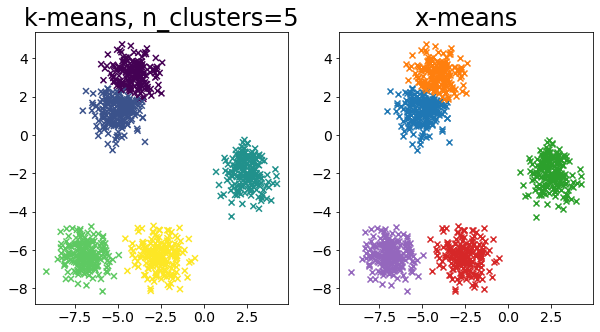

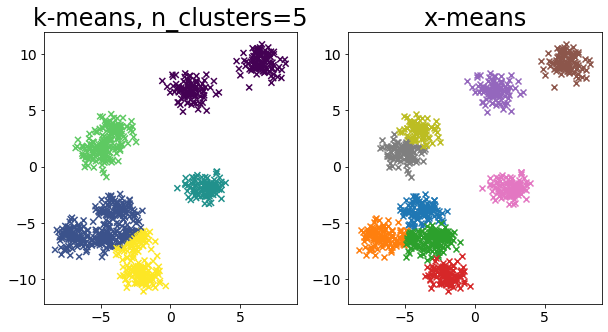

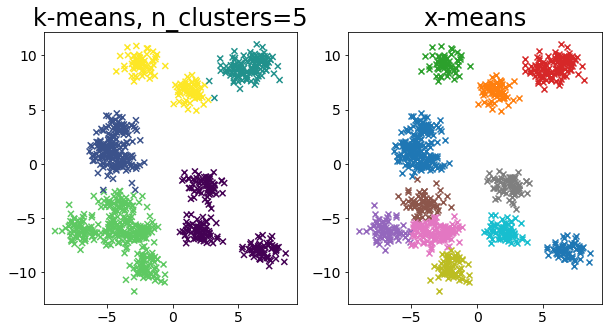

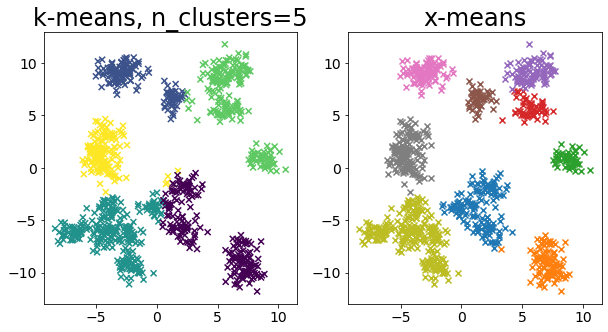

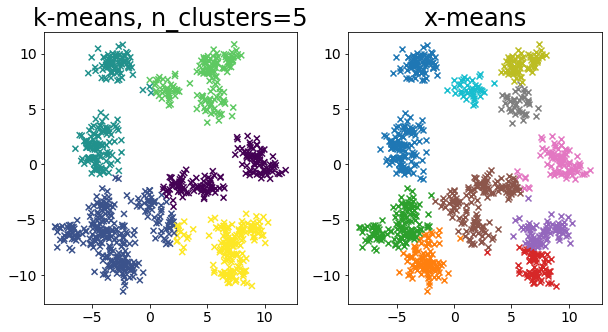

In [8]:
for i in range(5):
    X, _ = make_blobs(
        n_samples=n_samples,
        random_state=random_state,
        cluster_std=0.7,
        centers=5 + i * 5,
    )
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plot_by_kmeans(X)
    plt.subplot(1, 2, 2)
    plot_by_xmeans(X, c_min=3, c_max=20)
    plt.show()